# Image Processing Assignment: Exploring Lena
#### By: Rasheed Alqobbaj - 1202474

## Importing Libraries and Loading the Image

In [13]:
# Importing Libraries
import cv2 # OpenCV for image processing
import numpy as np # Numpy for numerical operations (arrays, matrices, etc.)
import matplotlib.pyplot as plt # Matplotlib for plotting

# Load the image
img = cv2.imread('Images/lena.jpg')

# Convert the image from BGR to RGB (OpenCV reads images in BGR format by default)
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Function to Display Images

In [14]:
def show_images(*images, titles=None, colormaps=None):
    # Get the number of images
    num_images = len(images)

    if titles is None:
        titles = [''] * num_images

    if colormaps is None:
        # if no cmap was selected set the cmap to the default value of 'viridis'
        colormaps = ['viridis'] * num_images

    if num_images == 1:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(images[0], cmap=colormaps[0])
        ax.set_title(titles[0])
        ax.axis('off')
    elif num_images == 2:
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        for i, ax in enumerate(axes):
            ax.imshow(images[i], cmap=colormaps[i])
            ax.set_title(titles[i])
            ax.axis('off')
    elif num_images == 3:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        for i, ax in enumerate(axes):
            ax.imshow(images[i], cmap=colormaps[i])
            ax.set_title(titles[i])
            ax.axis('off')
    elif num_images == 4:
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        for i, ax in enumerate(axes):
            ax.imshow(images[i], cmap=colormaps[i])
            ax.set_title(titles[i])
            ax.axis('off')


    plt.show()

## Color to Grayscale & Binary Conversion


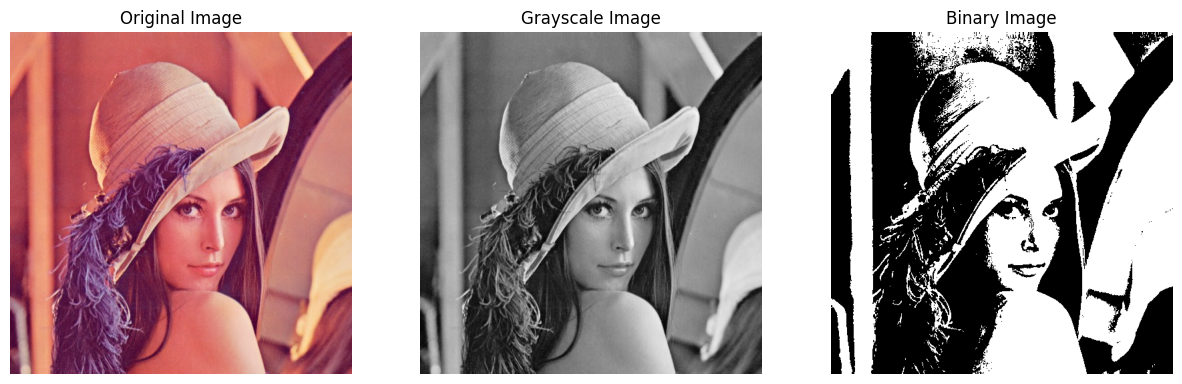

In [15]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the image to binary
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Save the images for submission
cv2.imwrite('Images/lena_gray.jpg', gray)
cv2.imwrite('Images/lena_binary.jpg', binary)

# Display the images
show_images(img_show, gray, binary, titles=['Original Image', 'Grayscale Image', 'Binary Image'], colormaps=['viridis', 'gray', 'gray'])

## Downscaling

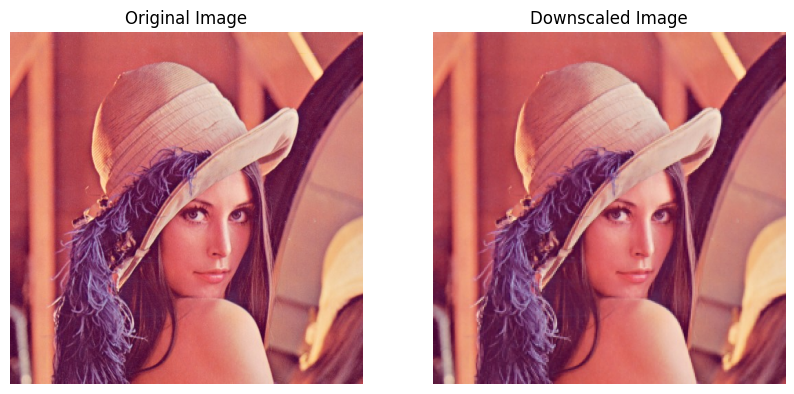

In [16]:
# Downscale the image from 512x512 to 256x256
downscaled = cv2.resize(img, (256, 256))

# Save the image for submission
cv2.imwrite('Images/lena_downscaled.jpg', cv2.cvtColor(downscaled, cv2.COLOR_BGR2RGB))

# Display the images
show_images(img_show, cv2.cvtColor(downscaled, cv2.COLOR_BGR2RGB), titles=['Original Image', 'Downscaled Image'])

## Image Analysis
### Mean, STD, Entropy, and Histogram

Mean: 124.04922103881836
Standard Deviation: 47.84514545225761
Entropy: 7.444966726047241


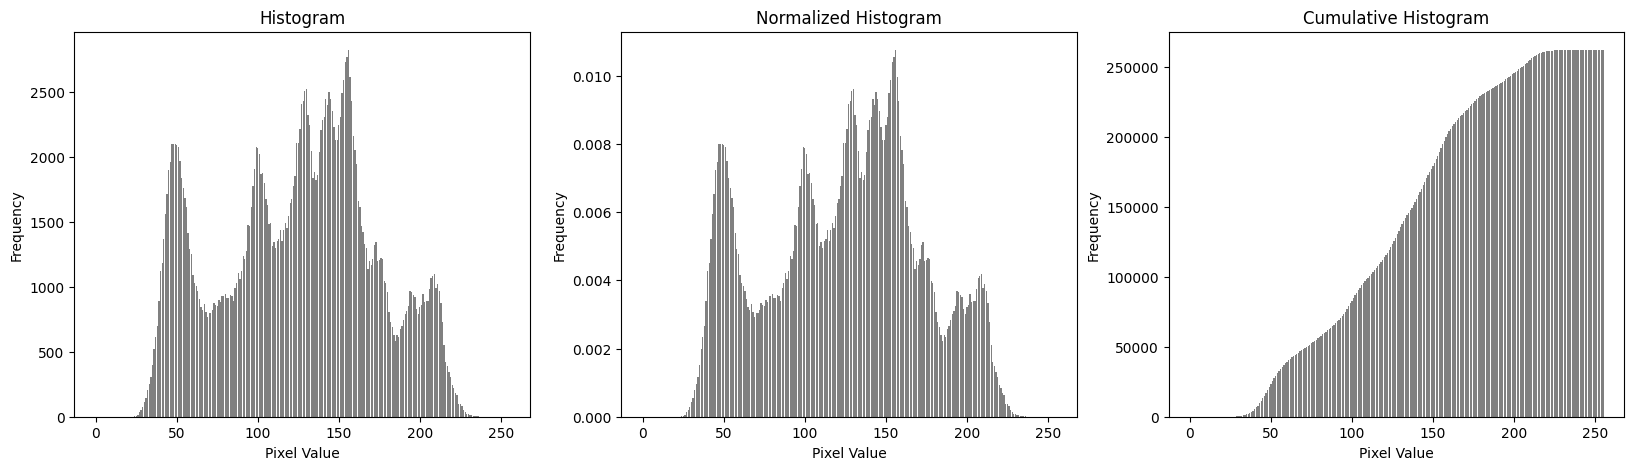

In [17]:
# Calculate the mean of the image
mean = np.mean(gray) # using numpy since images are stored as numpy arrays

# Calculate the standard deviation of the image
std = np.std(gray) 

# Calculate the histogram of the image using numpy
hist, _ = np.histogram(gray.ravel(), 256, (0, 256))

# Calculate the entropy of the image
entropy = -np.sum([(i/np.sum(hist)) * np.log2(i/np.sum(hist) + 1e-10) for i in hist if i > 0])

# Calculate the normalized histogram of the image
norm_hist = hist / np.sum(hist)

# Calculate the Cumulative Histogram of the image
cum_hist = np.cumsum(hist)

# Display the results
print(f'Mean: {mean}')
print(f'Standard Deviation: {std}')
print(f'Entropy: {entropy}')

# Plot the histograms
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.bar(np.arange(256), hist, color='gray')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), norm_hist, color='gray')
plt.title('Normalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.bar(np.arange(256), cum_hist, color='gray')
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()

## Contrast Enhancement

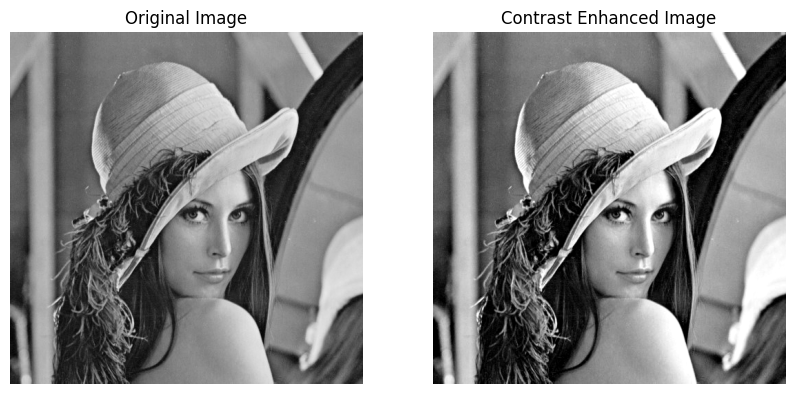

In [18]:
contrast = 1.5

# Apply contrast enhancement
cont_img = (gray - mean) * contrast + mean

# Clip the pixel values to ensure they are within the valid range of 0-255
cont_img = np.clip(cont_img, 0, 255).astype(np.uint8)

# Save the image for submission
cv2.imwrite('Images/lena_contrast.jpg', cont_img)

# Display the images
show_images(gray, cont_img, titles=['Original Image', 'Contrast Enhanced Image'], colormaps=['gray', 'gray'])

## Flipping and Blurring

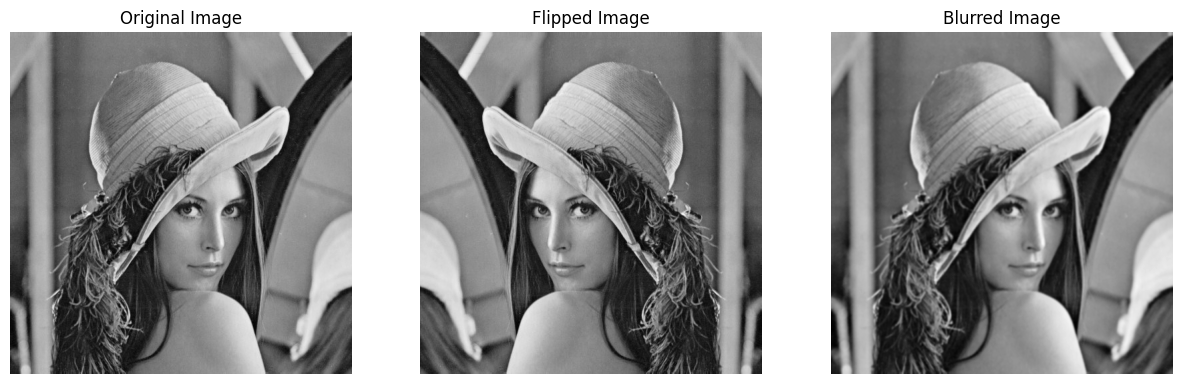

In [19]:
# Flip the image horizontally using numpy
flipped = np.fliplr(gray)

# Apply Gaussian Blur to the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Save the images for submission
cv2.imwrite('Images/lena_flipped.jpg', flipped)
cv2.imwrite('Images/lena_blurred.jpg', blurred)

# Display the images
show_images(gray, flipped, blurred, titles=['Original Image', 'Flipped Image', 'Blurred Image'], colormaps=['gray', 'gray', 'gray'])

## Negative Image

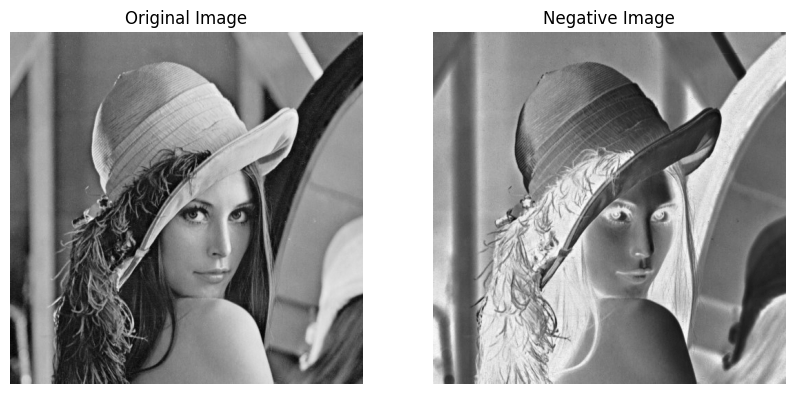

In [20]:
# Calculate the negative of the image
negative = 255 - gray

# Save the image for submission
cv2.imwrite('Images/lena_negative.jpg', negative)

# Display the images
show_images(gray, negative, titles=['Original Image', 'Negative Image'], colormaps=['gray', 'gray'])

## Custom Crop Function

Defining the crop_image function that takes an image and the coordinates of the top-left corner (x, y) and the height and width of the region to crop (h, w) and returns the cropped region.

In [21]:
def crop_image(image, x, y, h, w):
    return image[y:y+h, x:x+w]

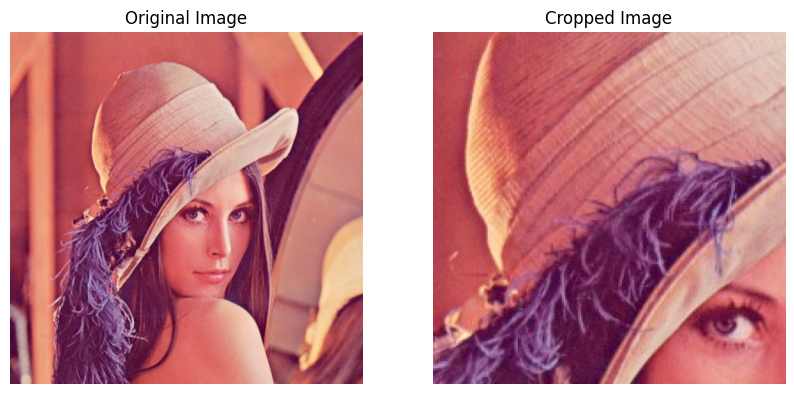

In [22]:
# Crop the image using the custom function
cropped = crop_image(img_show, 100, 100, 200, 200)

# Display the images
show_images(img_show, cropped, titles=['Original Image', 'Cropped Image'])

## Custom Histogram-based Search

In [23]:
def hist_search(image, strip):
    strip_sum = np.sum(strip, dtype=np.int64)
    strip_height, strip_width = strip.shape
    image_height, image_width = image.shape
    best_match = None
    best_difference = float('inf')

    for y in range(image_height - strip_height + 1):
        for x in range(image_width - strip_width + 1):
            window = image[y:y+strip_height, x:x+strip_width]
            window_sum = np.sum(window, dtype=np.int64)
            difference = abs(strip_sum - window_sum)
            if difference < best_difference:
                best_difference = difference
                best_match = (x, y)

    return best_match

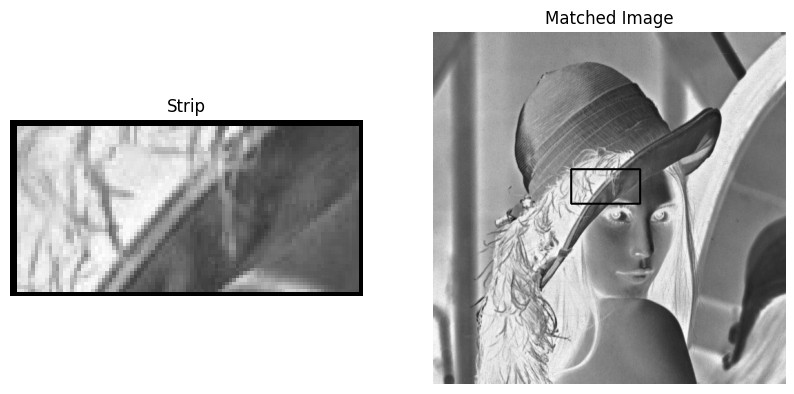

In [24]:
# Take a thin vertical strip from the image
strip = crop_image(gray, 200, 200, 50, 100)

# Search for the strip in the image
match = hist_search(gray, strip)

# Draw a rectangle around the matched region
matched_img = cv2.rectangle(gray, (match[0], match[1]), (match[0] + strip.shape[1], match[1] + strip.shape[0]), (255, 0, 0), 2)

# Display the images in grayscale
show_images(strip, matched_img, titles=['Strip', 'Matched Image'], colormaps=['gray_r', 'gray_r'])